## FASTA Format

FASTA format = list of proteins.

```python
#train_sequences.fasta
>sp|A0A0C5B5G6|MOTSC_HUMAN Mitochondrial-derived peptide ...
MRWQEMGYIFYPRKLR
```

where:
- Header line starts with >.
- After that, the protein ID (A0A0C5B5G6).
- Remaining text = metadata (species name, gene name).
- Next line(s) = amino-acid sequence.

Sequence characters are 20 amino acids:  
A C D E F G H I K L M N P Q R S T V W Y

Sequence is an input.

**testsuperset.fasta**: Same idea as training FASTA, but includes proteins without known labels yet.  
Header contains: Protein ID, Species taxon ID


## Ontology aspect

```python
# train_terms.tsv
EntryID      term          aspect
Q5W0B1       GO:0000785    C
Q5W0B1       GO:0004842    F
```
Means:  

**EntryID** → this is the protein’s unique ID (from UniProt).  
**term** → the GO term ID (the label you're trying to predict).  
**aspect** → which ontology this term belongs to:
- F → Molecular Function
- C → Cellular Component
- P → Biological Process

# Taxonomy aspect

```python
# train_taxonomy.tsv
A0A0C5B5G6   9606
A0JNW5       9606
A0JP26       9606
```

Means:
- Protein ID  
- Species taxon ID (a numeric code for species). 
- ex: 9606 = Homo sapiens, 10116 = rat, 7955 = zebrafish, etc.  

Use-case:  
- To check domain shift (are some species overrepresented).
- Possibly include species embedding.

# GO Graphs

In go-basic.obo. 
Each entry defines a GO term:
- GO ID
- Name
- Relationships (is_a, part_of)
- Namespace (BP/MF/CC)

Why important?
- You can use parent-child structure for hierarchical losses.
- Also used to compute information accretion (IA).

# Information Accretion

```python
Example:
GO:0000001   0.0
GO:0000002   2.8496
```

Meaning:
- Each GO term has a weight based on "information accretion".
- More specific/rare terms → higher weight.
- Used in evaluation for weighted precision/recall.

You don't train with IA directly, but you can:
- Oversample high-IA terms
- Adjust loss weights

# Submission format:

```python
# Sample_submission.tsv
# Column format:
ProteinID   GOterm/Text   score   (optional text)
# For GO terms:
A0A0C5B5G6  GO:0000002  0.456
# For text descriptions:
A0A0C5B5G6  Text  0.456  Inhibits the folate cycle...
```

Number of proteins: 82404
Min length: 3
Max length: 35213
Mean length: 525.7882869763604
Median length: 409.0
95th percentile: 1318.0


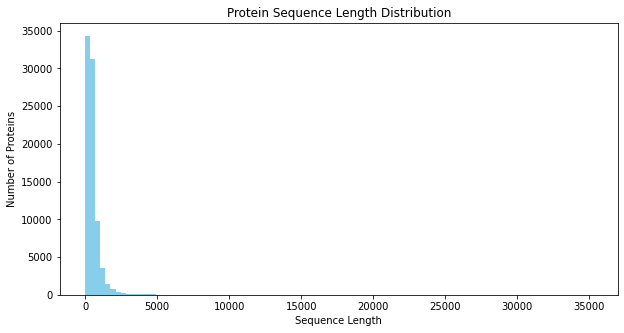

In [7]:
'''
Sequence Length Distribution
Purpose:
Determine min, max, median, mean, 95th percentile of protein lengths.
Helps decide truncation, pooling, or full-sequence modeling.
'''

from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

seq_file = "data/Train/train_sequences.fasta"

lengths = [len(record.seq) for record in SeqIO.parse(seq_file, "fasta")]

print("Number of proteins:", len(lengths))
print("Min length:", np.min(lengths))
print("Max length:", np.max(lengths))
print("Mean length:", np.mean(lengths))
print("Median length:", np.median(lengths))
print("95th percentile:", np.percentile(lengths, 95))

# Histogram
plt.figure(figsize=(10,5))
plt.hist(lengths, bins=100, color='skyblue')
plt.xlabel("Sequence Length")
plt.ylabel("Number of Proteins")
plt.title("Protein Sequence Length Distribution")
plt.show()


In [8]:
lengths = [len(record.seq) for record in SeqIO.parse(seq_file, "fasta")]
for len_bin in range(1000, 36001, 1000):
    count = sum(1 for length in lengths if len_bin-1000 < length <= len_bin)
    if count > 0:
        print(f"Length in ({(len_bin-1000)/1000}k, {len_bin/1000}k): {count} proteins")

Length in (0.0k, 1.0k): 74342 proteins
Length in (1.0k, 2.0k): 6709 proteins
Length in (2.0k, 3.0k): 932 proteins
Length in (3.0k, 4.0k): 217 proteins
Length in (4.0k, 5.0k): 121 proteins
Length in (5.0k, 6.0k): 50 proteins
Length in (6.0k, 7.0k): 9 proteins
Length in (7.0k, 8.0k): 7 proteins
Length in (8.0k, 9.0k): 9 proteins
Length in (12.0k, 13.0k): 1 proteins
Length in (13.0k, 14.0k): 2 proteins
Length in (14.0k, 15.0k): 1 proteins
Length in (18.0k, 19.0k): 2 proteins
Length in (34.0k, 35.0k): 1 proteins
Length in (35.0k, 36.0k): 1 proteins


In [9]:
seq_test = "data/Test/testsuperset.fasta"
lengths = [len(record.seq) for record in SeqIO.parse(seq_test, "fasta")]
for len_bin in range(1000, 36001, 1000):
    count = sum(1 for length in lengths if len_bin-1000 < length <= len_bin)
    if count > 0:
        print(f"Length in ({(len_bin-1000)/1000}k, {len_bin/1000}k): {count} proteins")

Length in (0.0k, 1.0k): 210182 proteins
Length in (1.0k, 2.0k): 11798 proteins
Length in (2.0k, 3.0k): 1622 proteins
Length in (3.0k, 4.0k): 362 proteins
Length in (4.0k, 5.0k): 195 proteins
Length in (5.0k, 6.0k): 87 proteins
Length in (6.0k, 7.0k): 14 proteins
Length in (7.0k, 8.0k): 19 proteins
Length in (8.0k, 9.0k): 11 proteins
Length in (9.0k, 10.0k): 3 proteins
Length in (10.0k, 11.0k): 2 proteins
Length in (11.0k, 12.0k): 3 proteins
Length in (12.0k, 13.0k): 1 proteins
Length in (13.0k, 14.0k): 3 proteins
Length in (14.0k, 15.0k): 1 proteins
Length in (15.0k, 16.0k): 2 proteins
Length in (18.0k, 19.0k): 2 proteins
Length in (34.0k, 35.0k): 1 proteins
Length in (35.0k, 36.0k): 1 proteins


Amino acid frequencies:
A: 0.0703
B: 0.0000
C: 0.0188
D: 0.0519
E: 0.0678
F: 0.0389
G: 0.0640
H: 0.0241
I: 0.0503
K: 0.0590
L: 0.0965
M: 0.0226
N: 0.0426
P: 0.0552
Q: 0.0440
R: 0.0536
S: 0.0830
T: 0.0545
U: 0.0000
V: 0.0622
W: 0.0118
X: 0.0000
Y: 0.0288


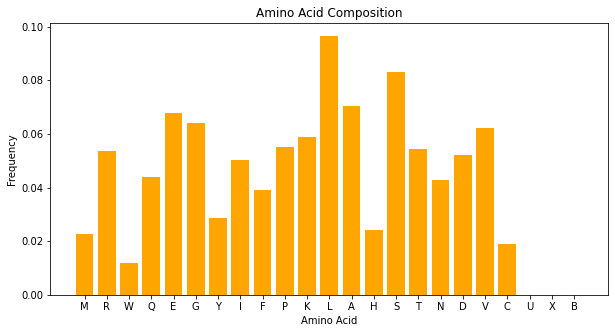

In [10]:
'''
Amino Acid Composition
Purpose:
Compute the frequency of each amino acid across all sequences.
Detect unusual residues (X, U, O).
Useful as simple features for baseline models.
'''

from collections import Counter

aa_counter = Counter()
total_residues = 0

for record in SeqIO.parse(seq_file, "fasta"):
    seq = str(record.seq).upper()
    aa_counter.update(seq)
    total_residues += len(seq)

aa_freq = {aa: count/total_residues for aa, count in aa_counter.items()}
print("Amino acid frequencies:")
for aa, freq in sorted(aa_freq.items()):
    print(f"{aa}: {freq:.4f}")

# Bar plot
plt.figure(figsize=(10,5))
plt.bar(aa_freq.keys(), aa_freq.values(), color='orange')
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.title("Amino Acid Composition")
plt.show()


In [11]:
'''
k-mer Frequencies
Purpose:
Calculate % of observed k-mers for k=2,3,4,5
Decide whether k-mer tokenization is feasible
'''

from collections import defaultdict
import itertools

k_values = [2,3,4,5]

sequences = [str(record.seq).upper() for record in SeqIO.parse(seq_file, "fasta")]

for k in k_values:
    observed = set()
    for seq in sequences:
        for i in range(len(seq)-k+1):
            observed.add(seq[i:i+k])
    possible = 20**k
    print(f"k={k}: {len(observed)} unique observed k-mers, {len(observed)/possible*100:.2f}% of all possible {possible}")


k=2: 480 unique observed k-mers, 120.00% of all possible 400
k=3: 8558 unique observed k-mers, 106.97% of all possible 8000
k=4: 160925 unique observed k-mers, 100.58% of all possible 160000
k=5: 2918724 unique observed k-mers, 91.21% of all possible 3200000


A k-mer is simply a substring of length k that you slide across a sequence.  
Instead of feeding a model one amino acid at a time, you can feed it short patterns of amino acids.  
Example:  
- k = 1 → vocabulary of 20 amino acids
- k = 3 → vocabulary of 20³ = 8000 possible 3-mers
- k = 5 → vocabulary of 3.2 million possible 5-mers

So as k increases:
- vocabulary explodes
- representation becomes more expressive
- but data becomes sparse
- models become harder to train

In [12]:
alphabet = set()
for seq in sequences:
    for aa in seq:
        alphabet.add(aa)

print("Unique residue symbols =", alphabet)
print("Alphabet size =", len(alphabet))

Unique residue symbols = {'K', 'W', 'D', 'U', 'G', 'C', 'R', 'S', 'N', 'F', 'Y', 'X', 'L', 'A', 'Q', 'E', 'V', 'M', 'I', 'P', 'H', 'T', 'B'}
Alphabet size = 23


In [13]:
'''
k-mer Frequencies (revised)
Purpose:
Calculate % of observed k-mers for k=2,3,4,5
Decide whether k-mer tokenization is feasible
'''

from collections import defaultdict
import itertools

k_values = [2,3,4,5]

sequences = [str(record.seq).upper() for record in SeqIO.parse(seq_file, "fasta")]

for k in k_values:
    observed = set()
    for seq in sequences:
        for i in range(len(seq)-k+1):
            observed.add(seq[i:i+k])
    possible = 23**k
    print(f"k={k}: {len(observed)} unique observed k-mers, {len(observed)/possible*100:.2f}% of all possible {possible}")


k=2: 480 unique observed k-mers, 90.74% of all possible 529
k=3: 8558 unique observed k-mers, 70.34% of all possible 12167
k=4: 160925 unique observed k-mers, 57.51% of all possible 279841
k=5: 2918724 unique observed k-mers, 45.35% of all possible 6436343


Statistics of GO terms per protein:
count    82404.000000
mean         6.517002
std          7.965655
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        233.000000
dtype: float64


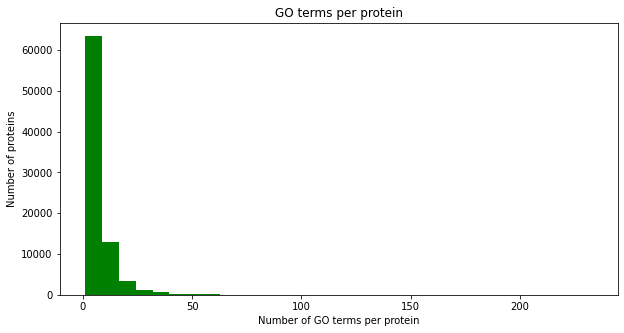

In [14]:
'''
Number of GO Terms per Protein
Purpose:
Histogram of how many terms each protein has
Determines multilabel distribution
'''

import pandas as pd

terms_df = pd.read_csv("data/Train/train_terms.tsv", sep="\t")
terms_per_protein = terms_df.groupby("EntryID").size()

print("Statistics of GO terms per protein:")
print(terms_per_protein.describe())

# Histogram
plt.figure(figsize=(10,5))
plt.hist(terms_per_protein, bins=30, color='green')
plt.xlabel("Number of GO terms per protein")
plt.ylabel("Number of proteins")
plt.title("GO terms per protein")
plt.show()


In [15]:
df = pd.read_csv("data/Train/train_terms.tsv", sep="\t", header=None, names=["Protein","GO","Ontology"])
num_terms = df["GO"].nunique()
print("Number of unique GO terms:", num_terms)

Number of unique GO terms: 26126


**GO = Gene Ontology**, a big standardized dictionary used in biology to describe what proteins do.

It has **three categories**:

1. **Biological Process (BP)**
   → *What does the protein help the cell do?*
   e.g., “DNA repair”, “cell division”

2. **Molecular Function (MF)**
   → *What action does the protein perform?*
   e.g., “ATP binding”, “kinase activity”

3. **Cellular Component (CC)**
   → *Where is the protein located?*
   e.g., “mitochondrion”, “nucleus”

A **GO term** is *one specific label* from this ontology.

Example GO terms (with IDs):

* **GO:0004674** — protein serine/threonine kinase activity
* **GO:0005634** — nucleus
* **GO:0006281** — DNA repair

Each one is like a tag that describes some aspect of the protein.

For each protein sequence, its GO terms are the **target labels** you want your model to predict.

Protein → many GO terms (not just one)
→ **multilabel classification**

Example:

```
Protein A:
  GO:0005634 (nucleus)
  GO:0006281 (DNA repair)
  GO:0005515 (protein binding)
```

So when you compute:

> “Number of GO Terms per Protein”

You’re essentially counting **how many labels each protein has**.

Some proteins have **3–5 GO terms**.
Some have **20–40 GO terms**.
It’s a very skewed distribution.


Top 10 most frequent terms:
term
GO:0005515    33713
GO:0005634    13283
GO:0005829    13040
GO:0005886    10150
GO:0005737     9442
GO:0005739     5807
GO:0005654     5065
GO:0016020     3563
GO:0042802     3547
GO:0005576     3241
Name: count, dtype: int64
Number of very rare terms (<=5 proteins): 14584


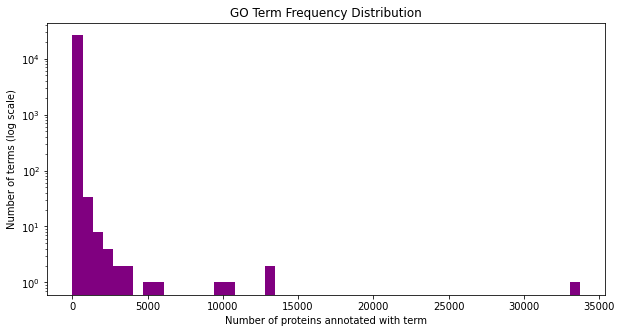

In [16]:
'''
Term Frequency Histogram
Purpose:
Check for label imbalance
Power-law distribution common (many rare terms)
'''

term_counts = terms_df['term'].value_counts()

print("Top 10 most frequent terms:")
print(term_counts.head(10))

print("Number of very rare terms (<=5 proteins):", sum(term_counts <= 5))

# Plot
plt.figure(figsize=(10,5))
plt.hist(term_counts, bins=50, color='purple', log=True)
plt.xlabel("Number of proteins annotated with term")
plt.ylabel("Number of terms (log scale)")
plt.title("GO Term Frequency Distribution")
plt.show()


In [17]:
'''
Per-Ontology Label Counts
Purpose:
Number of unique labels in BP, MF, CC
Decide if separate heads per ontology are useful
'''

ontology_counts = terms_df.groupby("aspect")['term'].nunique()
print("Unique GO terms per ontology:")
print(ontology_counts)


Unique GO terms per ontology:
aspect
C     2651
F     6616
P    16858
Name: term, dtype: int64


In [18]:
'''
Co-annotation Matrix
Purpose:
Correlation between terms
Use for hierarchical or graph-aware losses


protein_term = terms_df.pivot(index='EntryID', columns='term', values='term')
protein_term = protein_term.notnull().astype(int)  # 1 if term assigned, 0 otherwise

# Compute term correlation (pairwise co-occurrence)
co_occurrence = protein_term.T.dot(protein_term)
print("Co-annotation matrix shape:", co_occurrence.shape)
print("Sample co-occurrence between first 5 terms:")
print(co_occurrence.iloc[:5,:5])
'''



'\nCo-annotation Matrix\nPurpose:\nCorrelation between terms\nUse for hierarchical or graph-aware losses\n\n\nprotein_term = terms_df.pivot(index=\'EntryID\', columns=\'term\', values=\'term\')\nprotein_term = protein_term.notnull().astype(int)  # 1 if term assigned, 0 otherwise\n\n# Compute term correlation (pairwise co-occurrence)\nco_occurrence = protein_term.T.dot(protein_term)\nprint("Co-annotation matrix shape:", co_occurrence.shape)\nprint("Sample co-occurrence between first 5 terms:")\nprint(co_occurrence.iloc[:5,:5])\n'

             weight
count  40122.000000
mean       1.716517
std        2.637009
min        0.000000
25%        0.000000
50%        0.150287
75%        2.705504
max       14.861014


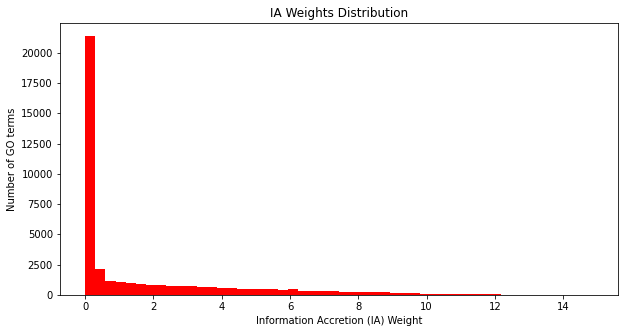

In [19]:
'''
IA Weights Distribution
Purpose:
Summary stats and histogram
Identify which terms are rare/deep (high IA)
'''

ia_df = pd.read_csv("data/IA.tsv", sep="\t", header=None, names=["GO","weight"])
print(ia_df.describe())

plt.figure(figsize=(10,5))
plt.hist(ia_df['weight'], bins=50, color='red')
plt.xlabel("Information Accretion (IA) Weight")
plt.ylabel("Number of GO terms")
plt.title("IA Weights Distribution")
plt.show()


Protein counts per species (taxon ID):
TaxID
9606      17162
10090     12508
3702      11863
559292     5520
10116      4909
          ...  
483148        1
145953        1
7048          1
6669          1
4568          1
Name: count, Length: 1381, dtype: int64


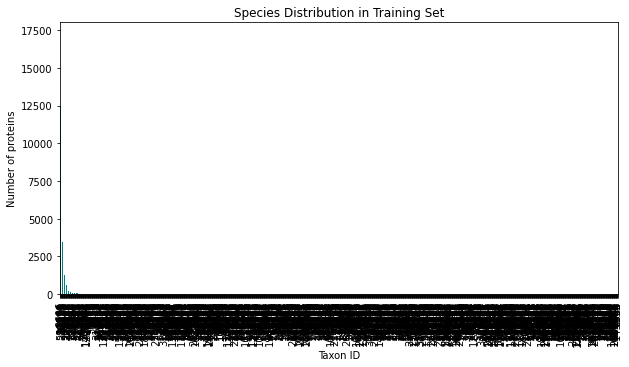

In [21]:
'''
Species Distribution
Purpose:
Number of proteins per species
Identify dominant species
'''

tax_df = pd.read_csv("data/Train/train_taxonomy.tsv", sep="\t", header=None, names=["ProteinID","TaxID"])
tax_counts = tax_df['TaxID'].value_counts()

print("Protein counts per species (taxon ID):")
print(tax_counts)

plt.figure(figsize=(10,5))
tax_counts.plot(kind='bar', color='teal')
plt.xlabel("Taxon ID")
plt.ylabel("Number of proteins")
plt.title("Species Distribution in Training Set")
plt.show()


# Data Cleaning Considerations

In [25]:
'''
1. Sequences that are too short

Very short proteins (<30–50 aa) often have:
no real structure
noisy or unreliable GO annotations
'''

num_short = sum(1 for length in lengths if length < 50)
print(f"Number of proteins shorter than 50 aa: {num_short}")

Number of proteins shorter than 50 aa: 9347


In [28]:
'''
2. Non-standard amino acids

We can keep only 20 canonical amino acids (ACDEFGHIKLMNPQRSTVWY).
Drop or replace sequences containing:
U (selenocysteine)
O (pyrrolysine)
B, Z, X, J (ambiguous)
'''
valid = set("ACDEFGHIKLMNPQRSTVWY")
num_valid = sum(1 for record in SeqIO.parse(seq_file, "fasta") if all(aa in valid for aa in str(record.seq).upper()))
print(f"Number of sequences with only standard amino acids: {num_valid}")
num_total = sum(1 for _ in SeqIO.parse(seq_file, "fasta"))
print(f"Total number of sequences: {num_total}")

Number of sequences with only standard amino acids: 82204
Total number of sequences: 82404


In [22]:
'''
3. Duplicate / Near-Duplicate Sequences

Purpose:
Detect identical sequences
Prevent trivial leakage
'''

seqs = {}
duplicates = 0
for record in SeqIO.parse(seq_file, "fasta"):
    seq_str = str(record.seq)
    if seq_str in seqs:
        duplicates += 1
    else:
        seqs[seq_str] = record.id

print(f"Number of exact duplicate sequences: {duplicates}")


Number of exact duplicate sequences: 1221


In [30]:
'''
4. Rare GO Terms

Remove GO terms that occur too rarely
If a GO term appears only 1–3 times, a model cannot learn it.
Typical cutoff: ≥10 occurrences.
'''

num_rare_terms = sum(1 for count in term_counts if count < 10)
print(f"Number of GO terms occurring less than 10 times: {num_rare_terms}")
num_go_terms = len(term_counts)
print(f"Total number of GO terms: {num_go_terms}")

# Remove proteins that have no GO terms after filtering
# If a protein loses all its labels → drop it.

Number of GO terms occurring less than 10 times: 18252
Total number of GO terms: 26125


#### Ensure GO terms are valid (obsolete terms)  
Gene Ontology retires terms.  
Replace obsolete ones by their “replaced_by” term if your dataset provides this mapping (or just drop them).
#### Collapse GO hierarchy if needed
Many GO terms are extremely specific.  
You can simplify labels by mapping them to parent terms to reduce label explosion.
#### Balance extremely skewed labels
Some GO terms appear thousands of times, some <10 times.  
Options:
- undersample very frequent labels
- oversample training proteins with rare labels
- use class-balanced loss or focal loss
#### Validate that GO terms match the correct ontology
Make sure:  
- BP → Biological Process
- MF → Molecular Function
- CC → Cellular Component

Sometimes mislabeled rows exist.

In [ ]:
%pip install goatools

In [ ]:
from goatools.obo_parser import GODag

go = GODag("data/Train/go-basic.obo")
term = go["GO:0004553"]

print("Parents:", term.parents)
print("Children:", term.children)


#### Why the GO DAG matters for function prediction (quick bullets)

1. **Labels aren’t independent.** Child → parent relationships mean if a protein has a specific (child) term it *should* also have its parents.
2. **You can reduce label complexity.** Collapse very-specific terms to higher-level parents to make learning easier.
3. **Score/metric weighting uses ontology info.** IA weights and Smin / semantic metrics use GO structure to value specific predictions more.
4. **Hierarchical losses improve learning and calibration.** Penalize violating parent/child logic and share signal across related terms.
5. **Better handling of rare terms.** If a child is rare, parent signals help transfer learning.
6. **Post-processing enforces consistency.** Clean up predictions by propagating children → parents (or using thresholds) to avoid biologically impossible outputs.
7. **Label correlation / graph features.** Use adjacency or term embeddings (graph convolutions, GNN) to model co-occurrence and semantics.
8. **Data-splitting and evaluation.** Use ontology-aware splits or inspect performance by depth/level to detect where the model fails (shallow vs deep terms).

#### Concrete things you should do (ordered by impact)

1) **Propagate labels upward (training-time).**

When creating your binary target matrix, include *all ancestor terms* for every annotated term. This simplifies the learning task and matches evaluation (CAFA expects ancestors implied).

Pseudo:

```python
# assume `go_ancestors(go_id)` returns all ancestors (including itself)
expanded_labels = defaultdict(set)
for protein, go in train_terms:
    for anc in go_ancestors(go):
        expanded_labels[protein].add(anc)
# convert expanded_labels -> binary matrix
```

**Why:** model sees parent signal even when only child annotated (reduces false negatives for parents).

2) **Use ontology-aware loss or regularizer.**

Options:

* **Parent consistency loss**: penalty if parent prob < child prob.

  * simple penalty term: `λ * sum(max(0, p_child - p_parent))`
* **Hierarchy-aware smoothing**: smooth label targets across ancestors (soft targets).
* **Graph-based label smoothing** via term adjacency / GNN on labels.

Example parent-consistency term:

```python
penalty = 0
for (child, parent) in is_a_edges:
    penalty += torch.relu(p_child - p_parent).mean()
loss = bce_loss + lambda_consistency * penalty
```

**Why:** encourages coherent outputs and reduces impossible predictions.

3) **Model structure: separate heads or shared + label graph.**

* **Per-ontology heads** (BP / MF / CC): because sizes and semantics differ; different losses/hyperparams.
* **Shared backbone + label GNN**: compute protein embedding `h`, then predict label scores by combining `h` with label embeddings produced by a GNN over the GO graph. This shares information across related terms.

High-level: `label_embs = GNN(adj, init_label_embs)`; `scores = sigmoid(MLP(h) · label_embs)`.

**Why:** captures co-occurrence patterns and hierarchy semantics.

4) **Use IA weights and semantic metrics in training/validation.**

* Use IA.tsv as term weights for loss or for threshold tuning.
* Report Fmax and Smin (semantic distance) in validation to measure biologically meaningful performance.

Example: weighted BCE with IA:

```python
weights = ia_weight[term]  # normalized
loss = BCE(target, pred) * weights
```
5) **Post-process predictions with ontology rules.**

Two typical rules:

* **Ancestor filling:** if child predicted above threshold, set all ancestors to 1.
* **Thresholding by depth:** use stricter thresholds for deep terms to avoid many false positives.

Simple ancestor filling:

```python
for protein in preds:
    for term in predicted_terms(protein):
        for anc in ancestors(term):
            preds[protein].add(anc)
```

**Why:** ensures biological consistency and often improves precision/recall tradeoffs.

6) **Deal with very-rare deep terms smartly.**

* If term frequency < cutoff, either collapse it up or treat it via transfer learning: predict parent first, then use a specialized classifier for child when enough positive examples available.
* Or use hierarchical evaluation-aware sampling: oversample proteins with rare deep terms.

7) **Use GO to design label reduction / curriculum**

* Start training on high-level terms (parents) and gradually introduce deeper terms — a curriculum that often helps optimization.

8) **Diagnostics: evaluate by depth/level**

Compute metrics stratified by term depth (root→deep). If performance drops for deep terms, that suggests need for hierarchical transfer or more data/augmentation for deep nodes.

#### Example pipeline (practical checklist)

1. Parse `go-basic.obo` → build `ancestors`, `is_a_edges`, depth for each term.
2. Expand training labels with ancestors.
3. Choose model (backbone → pooled embedding).
4. Predict raw scores for all terms.
5. Add parent-consistency penalty during training.
6. Validate using IA-weighted metrics and track performance by term depth.
7. Post-process predictions with ancestor filling.
8. Calibrate thresholds per term (or per depth) on validation.


#### Minimal code snippets

**build ancestry**

```python
from goatools.obo_parser import GODag
go = GODag("go-basic.obo")
anc = {tid: go[tid].get_all_parents() | {tid} for tid in go.keys()}
```

**expand labels**

```python
expanded = []
for pid, goid in train_pairs:
    for a in anc[goid]:
        expanded.append((pid,a))
# then turn expanded -> sparse binary matrix
```

**parent consistency penalty (PyTorch sketch)**

```python
# p: tensor (batch, num_terms)
pen = 0.0
for child, parent in is_a_edges:
    pen += torch.relu(p[:, idx(child)] - p[:, idx(parent)]).mean()
loss = bce + lambda_consistency * pen
```

#### Final short answer: how this helps the objective

* It **improves learning** by sharing signal across related labels (parents/children).
* It **reduces impossible outputs**, improving precision.
* It **helps with rare labels** via transfer from parents.
* It **matches evaluation** (semantic metrics and IA weights).
* It **gives actionable model choices**: separate heads, label GNN, hierarchical loss, ancestor propagation, and depth-aware thresholds.



## What are ESM embeddings?
ESM = Evolutionary Scale Modeling, a family of large protein language models from Meta AI.  
Think of ESM as GPT but trained on 250+ million protein sequences instead of text.  
It learns:
- biochemical patterns
- structural regularities
- functional motifs
- evolutionary conservation

When you input a protein sequence (e.g. "MAVFKL..."), ESM outputs a high-dimensional vector for each residue AND a full-sequence embedding.  
Typical embedding sizes:
```
Model	        Residue embedding dim	Sequence embedding
ESM-1b	        1280	                mean-pooling of residues
ESM-2 (650M)	1280	                same
ESM-2 (3B)      2560	                same
```
These embeddings capture semantics of proteins, similar to how BERT captures semantics of language.
## What are SwissProt embeddings?
SwissProt is the high-quality, manually curated subset of UniProt.  
SwissProt embeddings usually refer to:  
- ProtBert / ProtT5 / ProtXLNet models trained using the curated SwissProt dataset  
- They output 1024–2048 dimensional vectors per residue. 
- They are often more cleanly trained (less noise) than models trained on massive raw datasets.  
- They function similarly to ESM embeddings: contextual protein representations.  

## **1. Inputs & representation**

**Primary input:** protein sequences (AA sequences)

* Alphabet: 23 symbols (including `B`, `U`, `X`, `Z`)
* Typical length: mean ~526, median 409, but huge max (~35k). Most (95%) < 1.3k residues → could cap/truncate sequences or handle variable length.

**Feature ideas:**

* **One-hot encoding** of residues (23-dim)
* **k-mer embeddings** (`k=3` or `k=4` looks feasible)

  * k=3 observed ~70% of possible → good coverage
  * k=4 observed ~57% → sparse
* **Pretrained embeddings** (like ESM, ProtTrans) if you want state-of-the-art
* **Sequence length** can be a feature for some ML models

## **2. Targets (GO terms)**

* Total terms: 26k → huge, highly imbalanced
* Rare terms (<10 occurrences): 18k → very sparse
* Top 10 terms account for large fraction → long tail problem

**Considerations:**

1. **Hierarchical structure**

   * Use GO DAG to expand labels to include ancestors
   * Helps with parent consistency and reduces false negatives
2. **Class imbalance**

   * Many terms are rare
   * Options: oversample proteins with rare terms, use IA weights in loss, or hierarchical prediction (predict parents first)
3. **Ontology separation**

   * BP (16858), MF (6616), CC (2651) → could have separate prediction heads

**Label pre-processing steps:**

* Remove extremely rare terms (<=5 occurrences) OR combine them into parent/ancestor term
* Propagate labels up DAG
* Generate binary multi-hot vectors per protein

## **3. Data cleaning / filtering**

* Remove non-standard sequences? Only ~200 have `U`/`X` → likely negligible
* Remove sequences <50 aa? ~9k → maybe yes for stability
* Deduplicate sequences → already counted ~1.2k duplicates
* Sequence length cap for modeling → e.g., 1500–2000 residues
* Consider using only standard 20 AAs for simple embeddings, map others to unknown

## **4. Model design intuition**

**Challenges to tackle:**

* **Long sequences → need sequential or convolutional models**
* **Extreme label imbalance** → weighted loss, hierarchical modeling
* **Large output space (~26k)** → memory-efficient output layer or hierarchical prediction

**Model options:**

### **A) Sequence-based models**

1. **1D CNN**

   * Pros: fast, can capture local motifs
   * Cons: fixed receptive field (need deeper stacks for long dependencies)
2. **Transformer**

   * Pros: handles long-range dependencies
   * Cons: memory expensive for 1–35k residues → need truncation / pooling
3. **RNN / LSTM / GRU**

   * Pros: can handle variable length
   * Cons: slow for long sequences, gradient issues

### **B) K-mer / embedding + MLP**

* Convert sequence to k-mer embeddings → pool → MLP
* Can combine with GO term embeddings (GNN on DAG)

### **C) Hierarchical / label-aware output**

* **Separate heads** per ontology (BP/MF/CC)
* **Label graph embedding** → GNN over GO DAG → share info across related labels
* **Parent consistency loss** → encourages DAG-respecting predictions


## **5. Loss & evaluation considerations**

* **Loss:** weighted BCE with IA weights
* **Hierarchical regularization:** penalty if child prob > parent prob
* **Evaluation:** Fmax, Smin, semantic metrics (CAFA style)
* **Rare terms:** consider oversampling or curriculum learning from parents to children

## **6. Concrete preprocessing pipeline**

1. Filter sequences <50aa or with rare residues
2. Deduplicate sequences
3. Map residues to 0–22 integer indices (or one-hot)
4. Generate k-mer embeddings (optional)
5. Parse `go-basic.obo` → build ancestors and DAG
6. Expand labels for each protein to include all ancestors
7. Remove extremely rare GO terms OR map them to higher-level parent
8. Split into training/validation/test, stratified by number of labels / species (taxon)

## **7. Modeling intuition / “rules of thumb”**

* Start simple: **k-mer embeddings + MLP + weighted BCE**
* Add DAG-aware post-processing: ancestor filling → big precision gain
* Once pipeline works: **upgrade to CNN or Transformer backbone**
* Consider **GNN over GO DAG** for label embeddings → helps rare terms
* Separate ontology heads: improves convergence and interpretability

